In [1]:
import os
import GPUtil
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import cc3d
import tqdm
import nibabel as nib
from sklearn import metrics
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression

K = keras.backend

# AAL3 ROI Definition

In [2]:
def aal3_description():
    aal_dict = {}
    aal_dict[1] = 'Precentral', 'L.PreCG'
    aal_dict[2] = 'Precentral', 'R.PreCG'
    aal_dict[3] = 'Frontal_Sup', 'L.SFG'
    aal_dict[4] = 'Frontal_Sup', 'R.SFG'
    aal_dict[5] = 'Frontal_Mid', 'L.MFG'
    aal_dict[6] = 'Frontal_Mid', 'R.MFG'
    aal_dict[7] = 'Frontal_Inf_Oper', 'L.IFGoperc'
    aal_dict[8] = 'Frontal_Inf_Oper', 'R.IFGoperc'
    aal_dict[9] = 'Frontal_Inf_Tri', 'L.IFGtriang'
    aal_dict[10] = 'Frontal_Inf_Tri', 'R.IFGtriang'
    aal_dict[11] = 'Frontal_Inf_Orb', 'L.IFGorb'
    aal_dict[12] = 'Frontal_Inf_Orb', 'R.IFGorb'
    aal_dict[13] = 'Rolandic_Oper', 'L.ROL'
    aal_dict[14] = 'Rolandic_Oper', 'R.ROL'
    aal_dict[15] = 'Supp_Motor_Area', 'L.SMA'
    aal_dict[16] = 'Supp_Motor_Area', 'R.SMA'
    aal_dict[17] = 'Olfactory', 'L.OLF'
    aal_dict[18] = 'Olfactory', 'R.OLF'
    aal_dict[19] = 'Frontal_Sup_Med', 'L.SFGmedial'
    aal_dict[20] = 'Frontal_Sup_Med', 'R.SFGmedial'
    aal_dict[21] = 'Frontal_Med_Orb', 'L.PFCventmed'
    aal_dict[22] = 'Frontal_Med_Orb', 'R.PFCventmed'
    aal_dict[23] = 'Rectus', 'L.REC'
    aal_dict[24] = 'Rectus', 'R.REC'
    aal_dict[25] = 'OFCmed', 'L.OFCmed'
    aal_dict[26] = 'OFCmed', 'R.OFCmed'
    aal_dict[27] = 'OFCant', 'L.OFCant'
    aal_dict[28] = 'OFCant', 'R.OFCant'
    aal_dict[29] = 'OFCpost', 'L.OFCpost'
    aal_dict[30] = 'OFCpost', 'R.OFCpost'
    aal_dict[31] = 'OFClat', 'L.OFClat'
    aal_dict[32] = 'OFClat', 'R.OFClat'
    aal_dict[33] = 'Insula', 'L.INS'
    aal_dict[34] = 'Insula', 'R.INS'
    aal_dict[35] = 'Cingulate_Ant', 'L.ACC'
    aal_dict[36] = 'Cingulate_Ant', 'R.ACC'
    aal_dict[37] = 'Cingulate_Mid', 'L.MCC'
    aal_dict[38] = 'Cingulate_Mid', 'R.MCC'
    aal_dict[39] = 'Cingulate_Post', 'L.PCC'
    aal_dict[40] = 'Cingulate_Post', 'R.PCC'
    aal_dict[41] = 'Hippocampus', 'L.HIP'
    aal_dict[42] = 'Hippocampus', 'R.HIP'
    aal_dict[43] = 'ParaHippocampal', 'L.PHG'
    aal_dict[44] = 'ParaHippocampal', 'R.PHG'
    aal_dict[45] = 'Amygdala', 'L.AMYG'
    aal_dict[46] = 'Amygdala', 'R.AMYG'
    aal_dict[47] = 'Calcarine', 'L.CAL'
    aal_dict[48] = 'Calcarine', 'R.CAL'
    aal_dict[49] = 'Cuneus', 'L.CUN'
    aal_dict[50] = 'Cuneus', 'R.CUN'
    aal_dict[51] = 'Lingual', 'L.LING'
    aal_dict[52] = 'Lingual', 'R.LING'
    aal_dict[53] = 'Occipital_Sup', 'L.SOG'
    aal_dict[54] = 'Occipital_Sup', 'R.SOG'
    aal_dict[55] = 'Occipital_Mid', 'L.MOG'
    aal_dict[56] = 'Occipital_Mid', 'R.MOG'
    aal_dict[57] = 'Occipital_Inf', 'L.IOG'
    aal_dict[58] = 'Occipital_Inf', 'R.IOG'
    aal_dict[59] = 'Fusiform', 'L.FFG'
    aal_dict[60] = 'Fusiform', 'R.FFG'
    aal_dict[61] = 'Postcentral', 'L.PoCG'
    aal_dict[62] = 'Postcentral', 'R.PoCG'
    aal_dict[63] = 'Parietal_Sup', 'L.SPG'
    aal_dict[64] = 'Parietal_Sup', 'R.SPG'
    aal_dict[65] = 'Parietal_Inf', 'L.IPG'
    aal_dict[66] = 'Parietal_Inf', 'R.IPG'
    aal_dict[67] = 'SupraMarginal', 'L.SMG'
    aal_dict[68] = 'SupraMarginal', 'R.SMG'
    aal_dict[69] = 'Angular', 'L.ANG'
    aal_dict[70] = 'Angular', 'R.ANG'
    aal_dict[71] = 'Precuneus', 'L.PCUN'
    aal_dict[72] = 'Precuneus', 'R.PCUN'
    aal_dict[73] = 'Paracentral_Lobule', 'L.PCL'
    aal_dict[74] = 'Paracentral_Lobule', 'R.PCL'
    aal_dict[75] = 'Caudate', 'L.CAU'
    aal_dict[76] = 'Caudate', 'R.CAU'
    aal_dict[77] = 'Putamen', 'L.PUT'
    aal_dict[78] = 'Putamen', 'R.PUT'
    aal_dict[79] = 'Pallidum', 'L.PAL'
    aal_dict[80] = 'Pallidum', 'R.PAL'
    aal_dict[81] = 'Thalamus', 'L.THA'
    aal_dict[82] = 'Thalamus', 'R.THA'
    aal_dict[83] = 'Heschl', 'L.HES'
    aal_dict[84] = 'Heschl', 'R.HES'
    aal_dict[85] = 'Temporal_Sup', 'L.STG'
    aal_dict[86] = 'Temporal_Sup', 'R.STG'
    aal_dict[87] = 'Temporal_Pole_Sup', 'L.TPOsup'
    aal_dict[88] = 'Temporal_Pole_Sup', 'R.TPOsup'
    aal_dict[89] = 'Temporal_Mid', 'L.MTG'
    aal_dict[90] = 'Temporal_Mid', 'R.MTG'
    aal_dict[91] = 'Temporal_Pole_Mid', 'L.TPOmid'
    aal_dict[92] = 'Temporal_Pole_Mid', 'R.TPOmid'
    aal_dict[93] = 'Temporal_Inf', 'L.ITG'
    aal_dict[94] = 'Temporal_Inf', 'R.ITG'
    aal_dict[95] = 'Cerebellum_Crus1', 'L.CERCRU1'
    aal_dict[96] = 'Cerebellum_Crus1', 'R.CERCRU1'
    aal_dict[97] = 'Cerebellum_Crus2', 'L.CERCRU2'
    aal_dict[98] = 'Cerebellum_Crus2', 'R.CERCRU2'
    aal_dict[99] = 'Cerebellum_3', 'L.CER3'
    aal_dict[100] = 'Cerebellum_3', 'R.CER3'
    aal_dict[101] = 'Cerebellum_4_5', 'L.CER4_5'
    aal_dict[102] = 'Cerebellum_4_5', 'R.CER4_5'
    aal_dict[103] = 'Cerebellum_6', 'L.CER6'
    aal_dict[104] = 'Cerebellum_6', 'R.CER6'
    aal_dict[105] = 'Cerebellum_7b', 'L.CER7b'
    aal_dict[106] = 'Cerebellum_7b', 'R.CER7b'
    aal_dict[107] = 'Cerebellum_8', 'L.CER8'
    aal_dict[108] = 'Cerebellum_8', 'R.CER8'
    aal_dict[109] = 'Cerebellum_9', 'L.CER9'
    aal_dict[110] = 'Cerebellum_9', 'R.CER9'
    aal_dict[111] = 'Cerebellum_10', 'L.CER10'
    aal_dict[112] = 'Cerebellum_10', 'R.CER10'
    aal_dict[113] = 'Vermis_1_2', 'VER1_2'
    aal_dict[114] = 'Vermis_3', 'VER3'
    aal_dict[115] = 'Vermis_4_5', 'VER4_5'
    aal_dict[116] = 'Vermis_6', 'VER6'
    aal_dict[117] = 'Vermis_7', 'VER7'
    aal_dict[118] = 'Vermis_8', 'VER8'
    aal_dict[119] = 'Vermis_9', 'VER9'
    aal_dict[120] = 'Vermis_10', 'VER10'
    aal_dict[121] = 'Thal_AV', 'L.tAV'
    aal_dict[122] = 'Thal_AV', 'R.tAV'
    aal_dict[123] = 'Thal_LP', 'L.tLP'
    aal_dict[124] = 'Thal_LP', 'R.tLP'
    aal_dict[125] = 'Thal_VA', 'L.tVA'
    aal_dict[126] = 'Thal_VA', 'R.tVA'
    aal_dict[127] = 'Thal_VL', 'L.tVL'
    aal_dict[128] = 'Thal_VL', 'R.tVL'
    aal_dict[129] = 'Thal_VPL', 'L.tVPL'
    aal_dict[130] = 'Thal_VPL', 'R.tVPL'
    aal_dict[131] = 'Thal_IL', 'L.tIL'
    aal_dict[132] = 'Thal_IL', 'R.tIL'
    aal_dict[133] = 'Thal_Re', 'L.tRe'
    aal_dict[134] = 'Thal_Re', 'R.tRe'
    aal_dict[135] = 'Thal_MDm', 'L.tMDm'
    aal_dict[136] = 'Thal_MDm', 'R.tMDm'
    aal_dict[137] = 'Thal_MDl', 'L.tMDl'
    aal_dict[138] = 'Thal_MDl', 'R.tMDl'
    aal_dict[139] = 'Thal_LGN', 'L.tLGN'
    aal_dict[140] = 'Thal_LGN', 'R.tLGN'
    aal_dict[141] = 'Thal_MGN', 'L.tMGN'
    aal_dict[142] = 'Thal_MGN', 'R.tMGN'
    aal_dict[143] = 'Thal_PuA', 'L.tPuA'
    aal_dict[144] = 'Thal_PuA', 'R.tPuA'
    aal_dict[145] = 'Thal_PuM', 'L.tPuM'
    aal_dict[146] = 'Thal_PuM', 'R.tPuM'
    aal_dict[147] = 'Thal_PuL', 'L.tPuL'
    aal_dict[148] = 'Thal_PuL', 'R.tPuL'
    aal_dict[149] = 'Thal_PuI', 'L.tPuI'
    aal_dict[150] = 'Thal_PuI', 'R.tPuI'
    aal_dict[151] = 'ACC_sub', 'L.ACCsub'
    aal_dict[152] = 'ACC_sub', 'R.ACCsub'
    aal_dict[153] = 'ACC_pre', 'L.ACCpre'
    aal_dict[154] = 'ACC_pre', 'R.ACCpre'
    aal_dict[155] = 'ACC_sup', 'L.ACCsup'
    aal_dict[156] = 'ACC_sup', 'R.ACCsup'
    aal_dict[157] = 'N_Acc', 'L.Nacc'
    aal_dict[158] = 'N_Acc', 'R.Nacc'
    aal_dict[159] = 'VTA', 'L.VTA'
    aal_dict[160] = 'VTA', 'R.VTA'
    aal_dict[161] = 'SN_pc', 'L.SNpc'
    aal_dict[162] = 'SN_pc', 'R.SNpc'
    aal_dict[163] = 'SN_pr', 'L.SNpr'
    aal_dict[164] = 'SN_pr', 'R.SNpr'
    aal_dict[165] = 'Red_N', 'L.RedN'
    aal_dict[166] = 'Red_N', 'R.RedN'
    aal_dict[167] = 'LC', 'L.LC'
    aal_dict[168] = 'LC', 'R.LC'
    aal_dict[169] = 'Raphe_D', 'RapheD'
    aal_dict[170] = 'Raphe_M', 'RapheM'
    return aal_dict

# ADNI Setting

In [3]:
class Utils:
    def __init__(self, scenario, network):  ## 여기 입력 무조건 확인하기!!
        self.scenario = scenario
        self.network = network
        self.density_type = "GM_mod_merg_s2.nii.gz"
        self.data_path = "/DataCommon2/ksoh/classification_performance/map_nonLinear_registration/densitymap/ADNI"
        self.w, self.h, self.d = 91, 109, 91

    def load_data(self):
        dat = nib.load(os.path.join(self.data_path, self.network, self.scenario, self.density_type))
        dat = np.array(dat.dataobj)
        
        ddat = np.empty((dat.shape[-1], self.w, self.h, self.d))
        for i in tqdm.trange(len(ddat), desc="Data re-indexing"): ddat[i] = dat[..., i]

        gt_zero_idx, gt_one_idx = np.squeeze(np.argwhere(lbl == 0)), np.squeeze(np.argwhere(lbl == 1))
        syn_zero_idx, syn_one_idx = np.squeeze(np.argwhere(lbl == 2)), np.squeeze(np.argwhere(lbl == 3))

        gt_zero_dat, gt_one_dat = ddat[gt_zero_idx], ddat[gt_one_idx]
        gt_zero_lbl, gt_one_lbl = np.zeros(len(gt_zero_dat)), np.ones(len(gt_one_dat))
        syn_zero_dat, syn_one_dat = ddat[syn_zero_idx], ddat[syn_one_idx]
        syn_zero_lbl, syn_one_lbl = np.zeros(len(syn_zero_dat)), np.ones(len(syn_one_dat))

        return np.expand_dims(np.concatenate([gt_zero_dat, gt_one_dat], axis=0), axis=-1), np.append(gt_zero_lbl, gt_one_lbl),\
               np.expand_dims(np.concatenate([syn_zero_dat, syn_one_dat], axis=0), axis=-1), np.append(syn_zero_lbl, syn_one_lbl)

    def evaluation_matrics(self, y_true, y_pred):
        acc = K.mean(K.equal(y_true, y_pred))
        auc = metrics.roc_auc_score(y_true, y_pred)
        tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
        sen = tp / (tp + fn)
        spe = tn / (fp + tn)
        return acc, auc, sen, spe

In [4]:
scenario, network, fold = "MCI_AD", "resnet", 0  # CN_AD, CN_MCI, MCI_AD | resnet, sononet
util = Utils(scenario=scenario, network=network)
gt_dat, gt_lbl, syn_dat, syn_lbl = util.load_data()

Total_z_idx, Total_o_idx = len(np.argwhere(gt_lbl == 0)[0]), len(np.where(gt_lbl == 1)[0])
amount_z, amount_o = len(Total_z_idx) // 5, len(Total_o_idx) // 5

Zvalid_idx = Total_z_idx[fold * amount_z:(fold + 1) * amount_z]
Ztrain_idx = np.setdiff1d(Total_z_idx, Zvalid_idx)
Ztest_idx = Zvalid_idx[:int(len(Zvalid_idx) / 2)]
Zvalid_idx = np.setdiff1d(Zvalid_idx, Ztest_idx)

Ovalid_idx = Total_o_idx[fold * amount_o:(fold + 1) * amount_o]
Otrain_idx = np.setdiff1d(Total_o_idx, Ovalid_idx)
Otest_idx = Ovalid_idx[:int(len(Ovalid_idx) / 2)]
Ovalid_idx = np.setdiff1d(Ovalid_idx, Otest_idx)

trn_all_idx = np.concatenate((Ztrain_idx, Otrain_idx))
gt_dat, gt_lbl = gt_dat[trn_all_idx], gt_lbl[trn_all_idx]

aal = np.array(nib.load(os.path.join(util.data_path, "AAL3v1.nii.gz")).dataobj)

Data re-indexing: 100%|████████████████████████████████████████████████████████████| 218/218 [00:01<00:00, 123.32it/s]


# Percentile Threshold (=0.99)

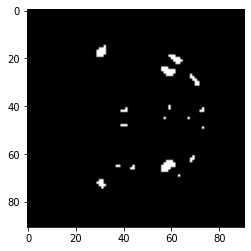

9027


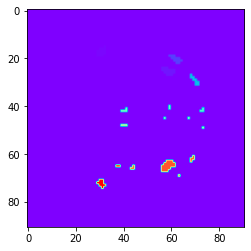

In [6]:
aal3 = nib.load(os.path.join(util.data_path, "AAL3v1.nii.gz"))
aal3_affine = aal3.affine
aal3 = aal3.dataobj

CN_diff = np.abs(gt_dat[np.where(gt_lbl == 0)] - syn_dat[np.where(syn_lbl == 1)])
AD_diff = np.abs(gt_dat[np.where(gt_lbl == 1)] - syn_dat[np.where(syn_lbl == 0)])
diff = np.concatenate([CN_diff, AD_diff], axis=0)
diff_mean = np.squeeze(np.mean(diff,axis=0))
# nib.save(nib.Nifti1Image(diff_mean, aal3_affine), os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_mean.nii.gz"%scenario)

connectivity = 6 # only 4,8 (2D) and 26, 18, and 6 (3D) are allowed

th = 99
diff_CCA_99 = np.float32(diff_mean >= np.percentile(diff_mean, th))
diff_CCA_99 = np.where(diff_CCA_99 != 0, 1, diff_CCA_99)
plt.imshow(diff_CCA_99[:,54,:], cmap="gray")
plt.show()
print(len(np.where(diff_CCA_99 == 1)[0]))

labels_out = cc3d.connected_components(diff_CCA_99, connectivity=connectivity)
plt.imshow(labels_out[:,54,:], cmap="rainbow")
plt.show()

# labels_out=np.expand_dims(labels_out, axis=-1)
# labels_out=nib.Nifti1Image(labels_out, aal3_affine)
# nib.save(labels_out, os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_CCA_99_labels.nii.gz"%scenario)

# diff_CCA_95=np.expand_dims(diff_CCA_95, axis=-1)
# diff_CCA_95=nib.Nifti1Image(diff_CCA_95, aal3_affine)
# nib.save(diff_CCA_95, os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_CCA_95.nii.gz"%scenario)

# diff_CCA_99=np.expand_dims(diff_CCA_99, axis=-1)
# diff_CCA_99=nib.Nifti1Image(diff_CCA_99, aal3_affine)
# nib.save(diff_CCA_99, os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_CCA_99.nii.gz"%scenario)

In [8]:
aal3_descri = aal3_description()
diff_temp=diff_CCA_99 * aal3
unique_rois = np.delete(np.unique(diff_temp), 0)

delete_idx = []
idx_order = np.empty(len(unique_rois))
for cnt, rois in enumerate(unique_rois):
    idx_order[cnt]=len(np.where(diff_temp == rois)[0])/len(np.where(np.array(aal3) == rois)[0])
    if len(np.where(diff_temp == rois)[0]) <= 10:
        delete_idx.append(cnt)

unique_rois = np.delete(unique_rois, delete_idx)
idx_order = np.delete(idx_order, delete_idx)        

idx_order = np.argsort(idx_order)[::-1]

print("Total significant ROIs: %d" % (len(unique_rois)))
for cnt, idx in enumerate(idx_order):
    print("ROI %d: %s | selected voxels: %d/%d: %.3f" % (unique_rois[idx], aal3_descri[unique_rois[idx]][0],
                 len(np.where(diff_temp == unique_rois[idx])[0]),
                len(np.where(np.array(aal3) == unique_rois[idx])[0]),
               len(np.where(diff_temp == unique_rois[idx])[0])/len(np.where(np.array(aal3) == unique_rois[idx])[0])))

# np.save(os.path.join(util.data_path,network,"results/CCA")+"/ADNI_Sig_ROIs_MCIAD.npy", unique_rois)  ####

Total significant ROIs: 75
ROI 151: ACC_sub | selected voxels: 37/168: 0.220
ROI 21: Frontal_Med_Orb | selected voxels: 156/719: 0.217
ROI 22: Frontal_Med_Orb | selected voxels: 159/856: 0.186
ROI 34: Insula | selected voxels: 323/1770: 0.182
ROI 33: Insula | selected voxels: 296/1858: 0.159
ROI 13: Rolandic_Oper | selected voxels: 155/988: 0.157
ROI 23: Rectus | selected voxels: 129/852: 0.151
ROI 74: Paracentral_Lobule | selected voxels: 114/836: 0.136
ROI 8: Frontal_Inf_Oper | selected voxels: 175/1399: 0.125
ROI 152: ACC_sub | selected voxels: 16/132: 0.121
ROI 7: Frontal_Inf_Oper | selected voxels: 107/1038: 0.103
ROI 9: Frontal_Inf_Tri | selected voxels: 258/2529: 0.102
ROI 65: Parietal_Inf | selected voxels: 246/2447: 0.101
ROI 87: Temporal_Pole_Sup | selected voxels: 128/1285: 0.100
ROI 39: Cingulate_Post | selected voxels: 46/463: 0.099
ROI 66: Parietal_Inf | selected voxels: 125/1345: 0.093
ROI 108: Cerebellum_8 | selected voxels: 208/2308: 0.090
ROI 110: Cerebellum_9 | selec

# GARD Setting

In [9]:
class Utils:
    def __init__(self, scenario, network):  ## 여기 입력 무조건 확인하기!!
        self.scenario = scenario
        self.network = network
        self.density_type = "GM_mod_merg_s2.nii.gz"
        self.data_path = "/DataCommon2/ksoh/classification_performance/map_nonLinear_registration/densitymap/GARD"
        self.w, self.h, self.d = 91, 109, 91

    def load_data(self):
        dat = nib.load(os.path.join(self.data_path, self.network, self.scenario, self.density_type))
        dat = np.array(dat.dataobj)
        
        ddat = np.empty((dat.shape[-1], self.w, self.h, self.d))
        for i in tqdm.trange(len(ddat), desc="Data re-indexing"): ddat[i] = dat[..., i]

        gt_zero_idx, gt_one_idx = np.squeeze(np.argwhere(lbl == 0)), np.squeeze(np.argwhere(lbl == 1))
        syn_zero_idx, syn_one_idx = np.squeeze(np.argwhere(lbl == 2)), np.squeeze(np.argwhere(lbl == 3))

        gt_zero_dat, gt_one_dat = ddat[gt_zero_idx], ddat[gt_one_idx]
        gt_zero_lbl, gt_one_lbl = np.zeros(len(gt_zero_dat)), np.ones(len(gt_one_dat))
        syn_zero_dat, syn_one_dat = ddat[syn_zero_idx], ddat[syn_one_idx]
        syn_zero_lbl, syn_one_lbl = np.zeros(len(syn_zero_dat)), np.ones(len(syn_one_dat))

        return np.expand_dims(np.concatenate([gt_zero_dat, gt_one_dat], axis=0), axis=-1), np.append(gt_zero_lbl, gt_one_lbl),\
               np.expand_dims(np.concatenate([syn_zero_dat, syn_one_dat], axis=0), axis=-1), np.append(syn_zero_lbl, syn_one_lbl)

    def evaluation_matrics(self, y_true, y_pred):
        acc = K.mean(K.equal(y_true, y_pred))
        auc = metrics.roc_auc_score(y_true, y_pred)
        tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
        sen = tp / (tp + fn)
        spe = tn / (fp + tn)
        return acc, auc, sen, spe

In [10]:
scenario, network = "MCI_AD", "resnet"  # CN_AD, CN_MCI, MCI_AD | resnet, sononet
util = Utils(scenario=scenario, network=network)
gt_dat, gt_lbl, syn_dat, syn_lbl = util.load_data()

Total_z_idx, Total_o_idx = len(np.argwhere(gt_lbl == 0)[0]), len(np.where(gt_lbl == 1)[0])
amount_z, amount_o = len(Total_z_idx) // 5, len(Total_o_idx) // 5

Zvalid_idx = Total_z_idx[fold * amount_z:(fold + 1) * amount_z]
Ztrain_idx = np.setdiff1d(Total_z_idx, Zvalid_idx)
Ztest_idx = Zvalid_idx[:int(len(Zvalid_idx) / 2)]
Zvalid_idx = np.setdiff1d(Zvalid_idx, Ztest_idx)

Ovalid_idx = Total_o_idx[fold * amount_o:(fold + 1) * amount_o]
Otrain_idx = np.setdiff1d(Total_o_idx, Ovalid_idx)
Otest_idx = Ovalid_idx[:int(len(Ovalid_idx) / 2)]
Ovalid_idx = np.setdiff1d(Ovalid_idx, Otest_idx)

trn_all_idx = np.concatenate((Ztrain_idx, Otrain_idx))
gt_dat, gt_lbl = gt_dat[trn_all_idx], gt_lbl[trn_all_idx]

aal = np.array(nib.load(os.path.join(util.data_path, "AAL3v1.nii.gz")).dataobj)

Data re-indexing: 100%|████████████████████████████████████████████████████████████| 194/194 [00:01<00:00, 167.25it/s]


# Percentile Threshold (=0.99)

/DataCommon2/ksoh/classification_performance/map_nonLinear_registration/densitymap/GARD/resnet/results/CCA


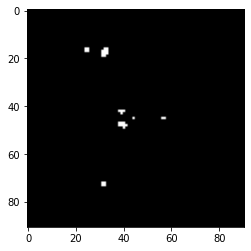

9027


In [11]:
aal3 = nib.load(os.path.join(util.data_path, "AAL3v1.nii.gz"))
aal3_affine = aal3.affine
aal3 = aal3.dataobj

CN_diff = np.abs(gt_dat[np.where(gt_lbl == 0)] - syn_dat[np.where(syn_lbl == 1)])
AD_diff = np.abs(gt_dat[np.where(gt_lbl == 1)] - syn_dat[np.where(syn_lbl == 0)])
diff = np.concatenate([CN_diff, AD_diff], axis=0)
diff_mean = np.squeeze(np.mean(diff,axis=0))
print(os.path.join(util.data_path,network,"results/CCA"))
# nib.save(nib.Nifti1Image(diff_mean, aal3_affine), os.path.join(util.data_path,network,"results")+"/%s_diff_mean.nii.gz"%scenario)

connectivity = 6 # only 4,8 (2D) and 26, 18, and 6 (3D) are allowed

th = 99
diff_CCA_99 = np.float32(diff_mean >= np.percentile(diff_mean, th))
diff_CCA_99 = np.where(diff_CCA_99 != 0, 1, diff_CCA_99)
plt.imshow(diff_CCA_99[:,54,:], cmap="gray")
plt.show()
print(len(np.where(diff_CCA_99 == 1)[0]))

labels_out = cc3d.connected_components(diff_CCA_99, connectivity=connectivity)

# labels_out=np.expand_dims(labels_out, axis=-1)
# labels_out=nib.Nifti1Image(labels_out, aal3_affine)
# nib.save(labels_out, os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_CCA_99_labels.nii.gz"%scenario)

# diff_CCA_99=np.expand_dims(diff_CCA_99, axis=-1)
# diff_CCA_99=nib.Nifti1Image(diff_CCA_99, aal3_affine)
# nib.save(diff_CCA_99, os.path.join(util.data_path,network,"results/CCA")+"/%s_diff_CCA_99.nii.gz"%scenario)

In [12]:
aal3_descri = aal3_description()
diff_temp=diff_CCA_99 * aal3
unique_rois = np.delete(np.unique(diff_temp), 0)

delete_idx = []
idx_order = np.empty(len(unique_rois))
for cnt, rois in enumerate(unique_rois):
    idx_order[cnt]=len(np.where(diff_temp == rois)[0])/len(np.where(np.array(aal3) == rois)[0])
    if len(np.where(diff_temp == rois)[0]) <= 10:
        delete_idx.append(cnt)

unique_rois = np.delete(unique_rois, delete_idx)
idx_order = np.delete(idx_order, delete_idx)        

idx_order = np.argsort(idx_order)[::-1]

print("Total significant ROIs: %d" % (len(unique_rois)))
for cnt, idx in enumerate(idx_order):
    print("ROI %d: %s | selected voxels: %d/%d: %.3f" % (unique_rois[idx], aal3_descri[unique_rois[idx]][0],
                 len(np.where(diff_temp == unique_rois[idx])[0]),
                len(np.where(np.array(aal3) == unique_rois[idx])[0]),
               len(np.where(diff_temp == unique_rois[idx])[0])/len(np.where(np.array(aal3) == unique_rois[idx])[0])))

# np.save(os.path.join(util.data_path,network,"results/CCA")+"/GARD_Sig_ROIs_MCIAD.npy", unique_rois)

Total significant ROIs: 80
ROI 45: Amygdala | selected voxels: 102/220: 0.464
ROI 106: Cerebellum_7b | selected voxels: 187/534: 0.350
ROI 98: Cerebellum_Crus2 | selected voxels: 617/2117: 0.291
ROI 151: ACC_sub | selected voxels: 47/168: 0.280
ROI 97: Cerebellum_Crus2 | selected voxels: 517/1894: 0.273
ROI 105: Cerebellum_7b | selected voxels: 158/585: 0.270
ROI 46: Amygdala | selected voxels: 61/248: 0.246
ROI 21: Frontal_Med_Orb | selected voxels: 170/719: 0.236
ROI 22: Frontal_Med_Orb | selected voxels: 202/856: 0.236
ROI 153: ACC_pre | selected voxels: 135/627: 0.215
ROI 135: Thal_MDm | selected voxels: 24/117: 0.205
ROI 152: ACC_sub | selected voxels: 24/132: 0.182
ROI 108: Cerebellum_8 | selected voxels: 402/2308: 0.174
ROI 146: Thal_PuM | selected voxels: 31/178: 0.174
ROI 23: Rectus | selected voxels: 131/852: 0.154
ROI 107: Cerebellum_8 | selected voxels: 282/1887: 0.149
ROI 154: ACC_pre | selected voxels: 82/648: 0.127
ROI 37: Cingulate_Mid | selected voxels: 243/1941: 0.125

In [22]:
path = "/DataCommon2/ksoh/classification_performance/map_nonLinear_registration/densitymap/ADNI/resnet/results/CCA"

adni_sig_CNAD_rois = np.load(path + "/ADNI_Sig_ROIs_CNAD.npy").astype("int32")
adni_sig_CNMCI_rois = np.load(path + "/ADNI_Sig_ROIs_CNMCI.npy").astype("int32")
adni_sig_MCIAD_rois = np.load(path + "/ADNI_Sig_ROIs_MCIAD.npy").astype("int32")
adni_ttest_CNAD_rois = np.load(path + "/ADNI_ttest_ROIs_CNAD.npy").astype("int32")
adni_ttest_CNMCI_rois = np.load(path + "/ADNI_ttest_ROIs_CNMCI.npy").astype("int32")
adni_ttest_MCIAD_rois = np.load(path + "/ADNI_ttest_ROIs_MCIAD.npy").astype("int32")

path = "/DataCommon2/ksoh/classification_performance/map_nonLinear_registration/densitymap/GARD/resnet/results/CCA"

gard_sig_CNAD_rois = np.load(path + "/GARD_Sig_ROIs_CNAD.npy").astype("int32")
gard_sig_CNMCI_rois = np.load(path + "/GARD_Sig_ROIs_CNMCI.npy").astype("int32")
gard_sig_MCIAD_rois = np.load(path + "/GARD_Sig_ROIs_MCIAD.npy").astype("int32")
gard_ttest_CNAD_rois = np.load(path + "/GARD_ttest_ROIs_CNAD.npy").astype("int32")
gard_ttest_CNMCI_rois = np.load(path + "/GARD_ttest_ROIs_CNMCI.npy").astype("int32")
gard_ttest_MCIAD_rois = np.load(path + "/GARD_ttest_ROIs_MCIAD.npy").astype("int32")